In [2]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
import scipy.misc
import glob

In [3]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        
        #sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    def train(self, inputs_list, targets_list):
        #inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #output error 
        output_errors = targets - final_outputs
        #hidden error
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 3

# learning rate
learning_rate = 0.1

#instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
# training
epochs = 10
for e in range(epochs):
    for image_file_name in glob.glob('dataset/image_??.png'):
        label = int(image_file_name[-5])
       # print("here it is", label)
        img_array = scipy.misc.imread(image_file_name, flatten=True)
        img_data  = 255.0 - img_array.reshape(784)
        img_data = (img_data / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[label] = 0.99
        n.train(img_data, targets)
        pass
    pass

2
It's a plus


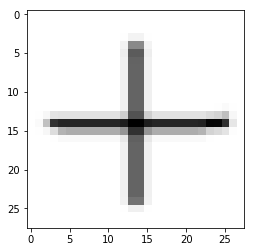

In [7]:
img_array = scipy.misc.imread('dataset/image_52.png',flatten=True)
img_data = 255.0 - img_array.reshape(784)
image_array = numpy.asfarray(img_data).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

img_data = (img_data / 255.0 * 0.99) + 0.01
outputs = n.query(img_data)
label = numpy.argmax(outputs)
print(label)
if label==0:
    print("it's a circle")
elif label==1:
    print("It's a triangle")
else:
    print("It's a plus")